# Python wrapper test

## Weibel simulation

### Prepare and run simulation

The `dims` variable corresponds to the global grid size. The cell size is set to $0.1^2$

In [2]:
from lib import em2d

# Grid parameters
dims   = [ 128, 128 ]
ntiles = [ 8, 8 ]
box = [ 0.1 * dims[0], 0.1 * dims[1] ]

# Simulation time
tmax   = 35.0

# Particle species
electrons = em2d.pySpecies( "electrons", -1, [4,4], 
                           udist = em2d.pyThermalCorr( [0.1, 0.1, 0.1], [ 0, 0, +0.6 ] ) )

positrons = em2d.pySpecies( "positrons", +1, [4,4], 
                           udist = em2d.pyThermalCorr( [0.1, 0.1, 0.1], [ 0, 0, -0.6 ] ) )


# Create simulation object
nx = [ dims[0]/ntiles[0], dims[1]/ntiles[1] ]
dt = 0.07
sim = em2d.pySimulation( ntiles, nx, box, dt, species = [electrons, positrons] )

# Iterate up to tmax
while sim.t < tmax:
    sim.advance()

print( "Simulation run up to t = {}".format(sim.t))

Simulation run up to t = 35.0


### Plot data directly from memory

(*info*) Energy at n = 500, t = 35
(*info*) electrons = 14.2941
(*info*) positrons = 14.3862
(*info*) Total particle energy = 28.6803
(*info*) Electric field = 4023.14
(*info*) Magnetic field = 1896.04
(*info*) total = 5947.86


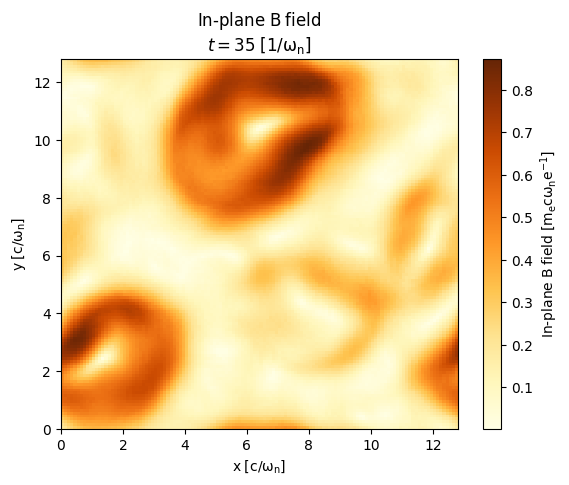

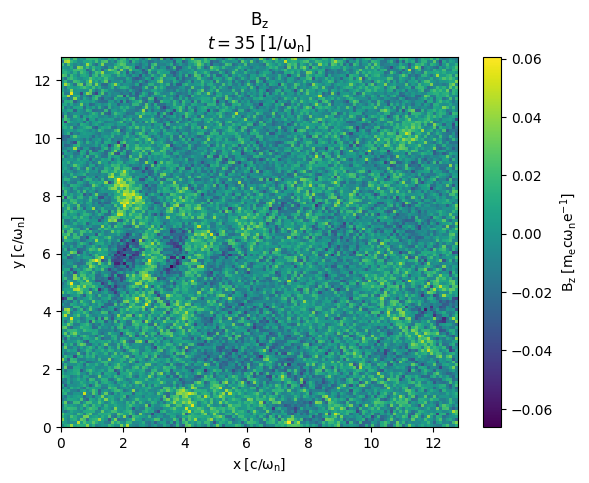

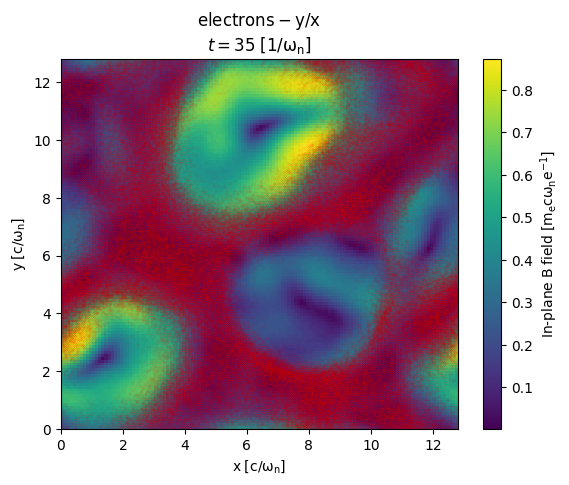

In [ ]:
# Print energy information
sim.energy_info()

# sim.emf.plot('E','x', vsim = True, cmap = "RdYlBu")
sim.emf.vplot('B', cmap = "YlOrBr")

# sim.current.vplot()

# Overlap particle data
sim.emf.vplot('B', show = False)
electrons.plot( 'x', 'y', c = 'r', grid = False )

### Access simulation data

Data is returned as NumPy arrays. Note that the data is copied from simulation memory each time the `gather()` functions are called.

In [6]:
Bx = sim.emf.B.gather('x')

Jz = sim.current.J.gather('z')

e_ux = electrons.gather('ux')
e_ux

array([ 0.03148871,  0.00189803,  0.27164602, ...,  0.3635941 ,
        0.09114744, -0.0400355 ], shape=(262144,), dtype=float32)

### Save data to disk

In [ ]:
sim.emf.save('B','x')
sim.emf.save('B','y')
sim.emf.save('B','z')

sim.current.save( 'z' )

# Save particle data
electrons.save()